In [1]:
using Plots
include("./phys2func.jl")

show (generic function with 1 method)

# 物理　第1編　第4章 第2節　慣性力　(p72)

##  慣性力

電車の中に小球をつりさげ、電車を加速させることを考える。

┌ Info: Saved animation to /var/folders/b5/z2qg52p549x8sbr6138wf9w00000gn/T/jl_fcjUXKVOzy.gif
└ @ Plots /Users/busseirironibarakidaigaku/.julia/packages/Plots/esM5q/src/animation.jl:156


Plots.AnimatedGif("/var/folders/b5/z2qg52p549x8sbr6138wf9w00000gn/T/jl_fcjUXKVOzy.gif")
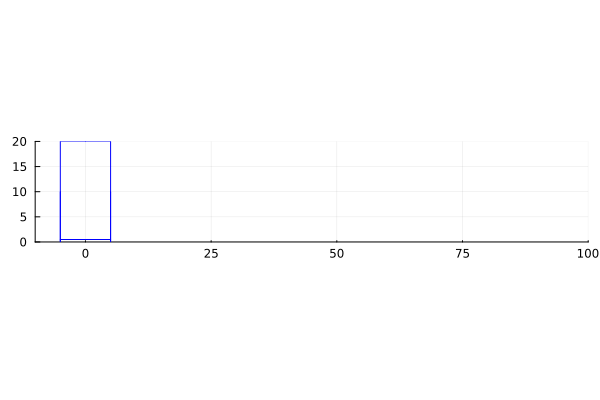

In [2]:
train2=Train(10,hight=20)
anim=Animation()
for i in 1:100
    plt=show(train2)
    frame(anim,plt)
    update!(train2)
end
gif(anim,fps=20)

(慣性力の資料はここらへんで中断しておく)